In [58]:
import pandas as pd
from pandas import Series as sr, DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks') 
#multiple grid styles in seaborn - whitegrid,darkgrid, white, dark, ticks
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

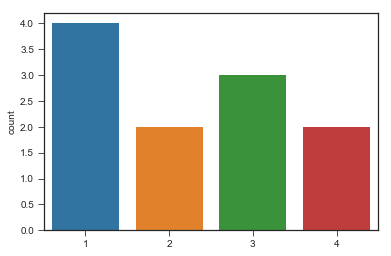

In [59]:
sns.countplot([1,2,3,4,1,2,3,4,3,1,1],data=None)
#notice the ticks on axis

In [60]:
##---------PART 1 - STOCK DATA READING FROM YAHOO FINANCES ------------##

In [61]:
sns.set_style('whitegrid')
#importind datareader of pandas to read from internet the stock data from microsoft,google,apple,amazon
#stock data from google-finances or yahoo-finances
import pandas_datareader.data as web
## DOCS : https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#
from datetime import datetime

In [62]:
#start and end date initialized
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
end

datetime.datetime(2019, 3, 30, 11, 41, 42, 655014)

In [63]:
tech_list = ['AAPL','GOOG','MSFT','AMZN'] #apple,google,microsoft,amazon
#create datasets for each stock data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end) #create global datasets, reading from yahoo finances

In [64]:
AAPL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-04-02  168.940002  164.470001  166.639999  166.679993  37586800.0   
2018-04-03  168.750000  164.880005  167.639999  168.389999  30278000.0   
2018-04-04  172.009995  164.770004  164.880005  171.610001  34605500.0   
2018-04-05  174.229996  172.080002  172.580002  172.800003  26933200.0   
2018-04-06  172.479996  168.199997  170.970001  168.380005  35005300.0   

             Adj Close  
Date                    
2018-04-02  164.180008  
2018-04-03  165.864349  
2018-04-04  169.036072  
2018-04-05  170.208206  
2018-04-06  165.854523

In [65]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   190.255180  186.518366  188.383865  188.439164  3.262624e+07   
std     22.059109   21.747162   21.909823   21.883565  1.425653e+07   
min    145.720001  142.000000  143.979996  142.190002  1.251390e+07   
25%    173.930000  170.379997  171.779999  172.364998  2.288735e+07   
50%    188.500000  185.919998  187.600006  187.179993  2.880760e+07   
75%    209.375000  205.784996  207.320000  207.760002  3.890535e+07   
max    233.470001  229.779999  230.779999  232.070007  9.624670e+07   

        Adj Close  
count  251.000000  
mean   187.003607  
std     21.594393  
min    141.582779  
25%    170.909996  
50%    185.775650  
75%    205.900421  
max    230.275482

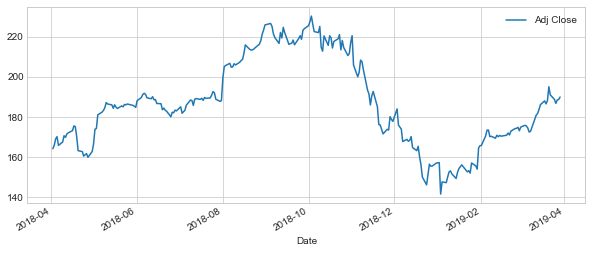

In [66]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend = True ,figsize = (10,4))

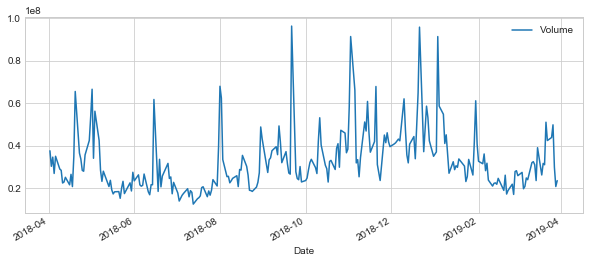

In [67]:
#total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend = True ,figsize = (10,4))

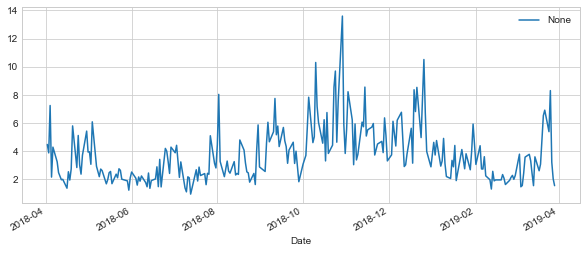

In [68]:
#variatin (High-Low of each day)
(AAPL['High']-AAPL['Low']).plot(legend=True,figsize = (10,4))

In [69]:
AAPL[AAPL.High-AAPL.Low > 4]
#note that peaks > 4 in the graph above and data below match

High         Low        Open       Close      Volume  \
Date                                                                     
2018-04-02  168.940002  164.470001  166.639999  166.679993  37586800.0   
2018-04-04  172.009995  164.770004  164.880005  171.610001  34605500.0   
2018-04-06  172.479996  168.199997  170.970001  168.380005  35005300.0   
2018-04-20  171.220001  165.429993  170.600006  165.720001  65491100.0   
2018-04-24  166.330002  161.220001  165.669998  162.940002  33692000.0   
2018-04-30  167.259995  161.839996  162.130005  165.259995  42427400.0   
2018-05-04  184.250000  178.169998  178.250000  183.830002  56201300.0   
2018-06-25  184.919998  180.729996  183.399994  182.169998  31663100.0   
2018-06-29  187.190002  182.910004  186.289993  185.110001  22737700.0   
2018-07-03  187.949997  183.539993  187.789993  183.919998  13954800.0   
2018-07-27  195.190002  190.100006  194.990005  190.979996  24024000.0   
2018-08-01  201.759995  197.309998  199.130005  201.500000  67935700.0   
2018-08-02  208.380005  200.350006  200.580002  207.389999  62404000.0   
2018-08-17  217.949997  213.160004  213.440002  217.580002  35427000.0   
2018-08-20  219.179993  215.110001  218.100006  215.460007  30287700.0   
2018-08-29  223.490005  219.410004  220.149994  222.979996  27254800.0   
2018-08-30  228.259995  222.399994  223.250000  225.029999  48793800.0   
2018-09-05  229.669998  225.100006  228.990005  226.869995  33333000.0   
2018-09-06  227.350006  221.300003  226.229996  223.100006  34290000.0   
2018-09-07  225.369995  220.710007  221.850006  221.300003  37619800.0   
2018-09-10  221.850006  216.470001  220.949997  218.330002  39516500.0   
2018-09-11  224.300003  216.559998  218.009995  223.850006  35749000.0   
2018-09-12  225.000000  219.839996  224.940002  221.070007  49278700.0   
2018-09-13  228.350006  222.570007  223.520004  226.410004  41706400.0   
2018-09-14  226.839996  222.520004  225.750000  223.839996  31999300.0   
2018-09-17  222.949997  217.270004  222.149994  217.880005  37195100.0   
2018-09-18  221.850006  217.119995  217.789993  218.240005  31571700.0   
2018-09-19  219.619995  215.300003  218.500000  218.369995  27123800.0   
2018-09-21  221.360001  217.289993  220.779999  217.660004  96246700.0   
2018-09-24  221.259995  216.630005  216.820007  220.789993  27693400.0   
...                ...         ...         ...         ...         ...   
2018-11-23  176.600006  172.100006  174.940002  172.289993  23624000.0   
2018-11-26  174.949997  170.259995  174.240005  174.619995  44998500.0   
2018-11-28  181.289993  174.929993  176.729996  180.940002  46062500.0   
2018-11-29  182.800003  177.699997  182.660004  179.550003  41770000.0   
2018-12-04  182.389999  176.270004  180.949997  176.690002  41344300.0   
2018-12-06  174.779999  170.419998  171.759995  174.720001  43098400.0   
2018-12-07  174.490005  168.300003  173.490005  168.490005  42281600.0   
2018-12-10  170.089996  163.330002  165.000000  169.600006  62026000.0   
2018-12-11  171.789993  167.000000  171.660004  168.630005  47281700.0   
2018-12-17  168.350006  162.729996  165.449997  163.940002  44287900.0   
2018-12-19  167.449997  159.089996  166.000000  160.889999  49047300.0   
2018-12-20  162.110001  155.300003  160.399994  156.830002  64773000.0   
2018-12-21  158.160004  149.630005  156.860001  150.729996  95744600.0   
2018-12-24  151.550003  146.589996  148.149994  146.830002  37169200.0   
2018-12-26  157.229996  146.720001  148.300003  157.169998  58582500.0   
2018-12-27  156.770004  150.070007  155.839996  156.149994  53117100.0   
2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
2019-01-09  154.529999  149.630005  151.289993  153.309998  45099100.0   
2019-01-17  157.660004  153.259995  154.199997  155.860001  29821200.0   
2019-01-22  156.729996  152.619995  156.410004  153.300003  30394000.0   
2019-01-29  158.130005

In [70]:
(AAPL['High']-AAPL.Low).max() #155.190002-146.020004 on 2017-06-09 denotes the global maxima of the graph above

13.600006103515625

In [71]:
##------------- PART 2 - SIMPLE MOVING AVERAGE METHOD FOR PREDICTION -------------###

In [72]:
##Moving Average

In [73]:
ma_day = [10,20,50] #moving average for 10,20 and 50 days
for ma in ma_day : 
    col_name = "Mov. Avg. for %s days" %str(ma) 
    AAPL[col_name] = AAPL['Adj Close'].rolling(window = ma).mean() #Create 3 columns for each and computes moving average 

In [74]:
AAPL.head(50)

High         Low        Open       Close      Volume  \
Date                                                                     
2018-04-02  168.940002  164.470001  166.639999  166.679993  37586800.0   
2018-04-03  168.750000  164.880005  167.639999  168.389999  30278000.0   
2018-04-04  172.009995  164.770004  164.880005  171.610001  34605500.0   
2018-04-05  174.229996  172.080002  172.580002  172.800003  26933200.0   
2018-04-06  172.479996  168.199997  170.970001  168.380005  35005300.0   
2018-04-09  173.089996  169.850006  169.880005  170.050003  29017700.0   
2018-04-10  174.000000  171.529999  173.000000  173.250000  28408600.0   
2018-04-11  173.919998  171.699997  172.229996  172.440002  22431600.0   
2018-04-12  175.000000  173.039993  173.410004  174.139999  22889300.0   
2018-04-13  175.839996  173.850006  174.779999  174.729996  25124300.0   
2018-04-16  176.190002  174.830002  175.029999  175.820007  21578400.0   
2018-04-17  178.940002  176.410004  176.490005  178.240005  26509000.0   
2018-04-18  178.820007  176.880005  177.809998  177.839996  20754500.0   
2018-04-19  175.389999  172.660004  173.759995  172.800003  34808800.0   
2018-04-20  171.220001  165.429993  170.600006  165.720001  65491100.0   
2018-04-23  166.919998  164.089996  166.830002  165.240005  36515500.0   
2018-04-24  166.330002  161.220001  165.669998  162.940002  33692000.0   
2018-04-25  165.419998  162.410004  162.619995  163.649994  28382100.0   
2018-04-26  165.729996  163.369995  164.119995  164.220001  27963000.0   
2018-04-27  164.330002  160.630005  164.000000  162.320007  35655800.0   
2018-04-30  167.259995  161.839996  162.130005  165.259995  42427400.0   
2018-05-01  169.199997  165.270004  166.410004  169.100006  53569400.0   
2018-05-02  177.750000  173.800003  175.229996  176.570007  66539400.0   
2018-05-03  177.500000  174.440002  175.880005  176.889999  34068200.0   
2018-05-04  184.250000  178.169998  178.250000  183.830002  56201300.0   
2018-05-07  187.669998  184.750000  185.179993  185.160004  42451400.0   
2018-05-08  186.220001  183.669998  184.990005  186.050003  28402800.0   
2018-05-09  187.399994  185.220001  186.550003  187.360001  23211200.0   
2018-05-10  190.369995  187.649994  187.740005  190.039993  27989300.0   
2018-05-11  190.059998  187.449997  189.490005  188.589996  26212200.0   
2018-05-14  189.529999  187.860001  189.009995  188.149994  20778800.0   
2018-05-15  187.070007  185.100006  186.779999  186.440002  23695200.0   
2018-05-16  188.460007  186.000000  186.070007  188.179993  19183100.0   
2018-05-17  188.910004  186.360001  188.000000  186.990005  17294000.0   
2018-05-18  187.809998  186.130005  187.190002  186.309998  18297700.0   
2018-05-21  189.270004  186.910004  188.000000  187.630005  18400800.0   
2018-05-22  188.880005  186.779999  188.380005  187.160004  15240700.0   
2018-05-23  188.500000  185.759995  186.350006  188.360001  20058400.0   
2018-05-24  188.839996  186.210007  188.770004  188.149994  23234000.0   
2018-05-25  189.649994  187.649994  188.229996  188.580002  17461000.0   
2018-05-29  188.750000  186.869995  187.600006  187.899994  22514100.0   
2018-05-30  188.000000  186.779999  187.720001  187.500000  18690500.0   
2018-05-31  188.229996  186.139999  187.220001  186.869995  27482800.0   
2018-06-01  190.259995  187.750000  187.990005  190.240005  23442500.0   
2018-06-04  193.419998  191.350006  191.639999  191.830002  26266200.0   
2018-06-05  193.940002  192.360001  193.070007  193.309998  21566000.0   
2018-06-06  194.080002  191.919998  193.630005  193.979996  20933600.0   
2018-06-07  194.199997  192.339996  194.139999  193.460007  21347200.0   
2018-06-08  192.000000  189.770004  191.169998  191.699997  26656800.0   
2018-06-11  191.970001  190.210007  191.350006  191.229996  18308500.0   

             Adj Close  Mov. Avg. for 10 days  Mov. Avg. for 20 days  \
Date                                                                   
2018-04-02  164.180008   

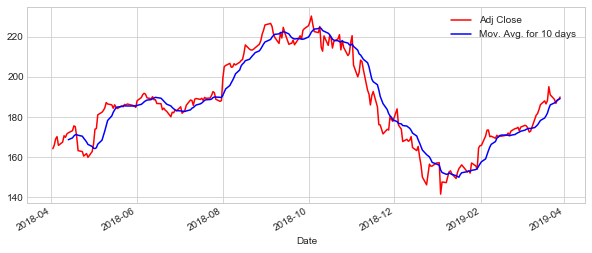

In [75]:
AAPL[['Adj Close','Mov. Avg. for 10 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

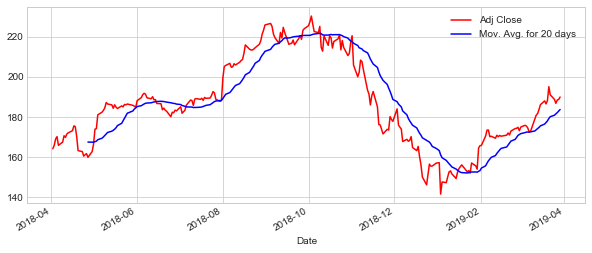

In [76]:
AAPL[['Adj Close','Mov. Avg. for 20 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

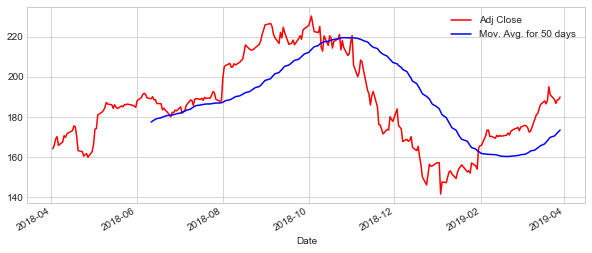

In [77]:
AAPL[['Adj Close','Mov. Avg. for 50 days']].plot(legend = True, figsize = (10,4), color = ['r','b'])

In [78]:
##------------ PART  3 - DAILY RETURN ANALYSIS -------------## 

In [79]:
AAPL['Adj Close'].pct_change().head() #using percentage change function pct_change

Date
2018-04-02         NaN
2018-04-03    0.010259
2018-04-04    0.019122
2018-04-05    0.006934
2018-04-06   -0.025579
Name: Adj Close, dtype: float64

In [80]:
#Calculating percentage change myself
pct_change = sr([np.NaN]*len(AAPL), index = AAPL.index)
for i in range(1,len(AAPL)):
    pct_change[i] = (AAPL['Adj Close'][i] - AAPL['Adj Close'][i-1]) / AAPL['Adj Close'][i-1]
print(pct_change.head())

Date
2018-04-02         NaN
2018-04-03    0.010259
2018-04-04    0.019122
2018-04-05    0.006934
2018-04-06   -0.025579
dtype: float64


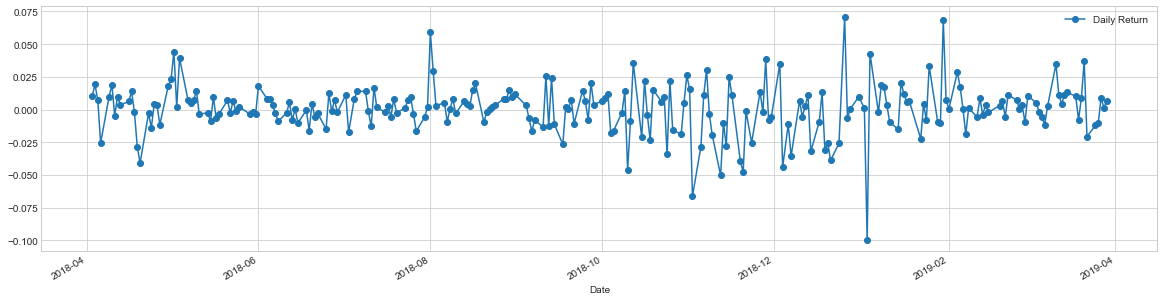

In [81]:
#plotting Daily return
AAPL['Daily Return'] = pct_change
AAPL['Daily Return'].plot(legend = True , figsize = (20,5) , marker ='o')

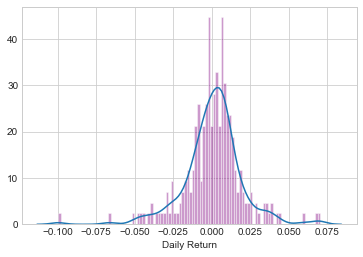

In [82]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100 , kde = True,hist_kws = {'edgecolor' : 'w', 'color' : 'purple'})

In [83]:
#Computing daily return for all four stocks
adj_close_df = df({'AAPL':AAPL['Adj Close'],'GOOG':GOOG['Adj Close'],
                   'MSFT':MSFT['Adj Close'],'AMZN':AMZN['Adj Close']})
adj_close_df.head()

AAPL         AMZN         GOOG       MSFT
Date                                                       
2018-04-02  164.180008  1371.989990  1006.469971  87.050652
2018-04-03  165.864349  1392.050049  1013.409973  88.220894
2018-04-04  169.036072  1410.569946  1025.140015  90.797409
2018-04-05  170.208206  1451.750000  1027.810059  90.846581
2018-04-06  165.854523  1405.229980  1007.039978  88.732277

In [84]:
pt_change = adj_close_df.pct_change()
pt_change.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2018-04-02       NaN       NaN       NaN       NaN
2018-04-03  0.010259  0.014621  0.006895  0.013443
2018-04-04  0.019122  0.013304  0.011575  0.029205
2018-04-05  0.006934  0.029194  0.002605  0.000542
2018-04-06 -0.025579 -0.032044 -0.020208 -0.023273

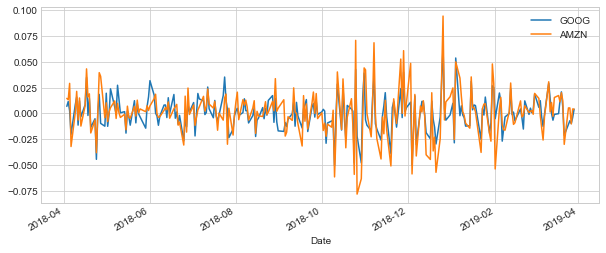

In [85]:
pt_change[['GOOG','AMZN']].plot(legend = True, figsize = (10,4))

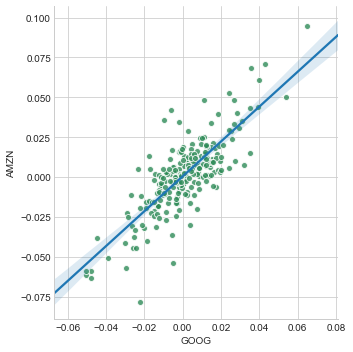

In [86]:
sns.lmplot(x='GOOG',y = 'AMZN' , data=pt_change, markers = 'o',scatter_kws = {'edgecolor' : 'w', 'color' : 'seagreen'})

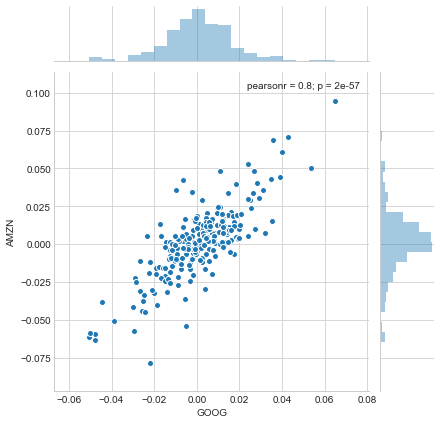

In [87]:
sns.jointplot(x='GOOG',y='AMZN', data= pt_change, marker='o',edgecolor = 'w')

In [88]:
##Calculating the Pearon r value (correlation coefficient)

In [89]:
sum_x = sum_y = sum_x_y = sum_x_sq = sum_y_sq = 0
n = len(pt_change)-1
for i in range(1,n+1):
    sum_x_y = sum_x_y + pt_change.GOOG[i]*pt_change.AMZN[i]
    sum_x = sum_x + pt_change.GOOG[i]
    sum_y = sum_y + pt_change.AMZN[i]
    sum_x_sq = sum_x_sq + pt_change.GOOG[i]**2
    sum_y_sq = sum_y_sq + pt_change.AMZN[i]**2

r = (n * sum_x_y - sum_x*sum_y)/(((n*sum_x_sq-(sum_x)**2)**0.5) * ((n*sum_y_sq-(sum_y)**2)**0.5))
R = r**2
print("Pearson r : %f" %r)
print("Coefficient of determination : %f" %R)

Pearson r : 0.802008
Coefficient of determination : 0.643216


In [90]:
##The above value and the pearson r value in the graph above are same = 0.64
##This shows that GOOG and AMZN daily return are POSITIVELY CORRELATED
### that means, the daily returns of Amazon are dependent on Google's by 42%

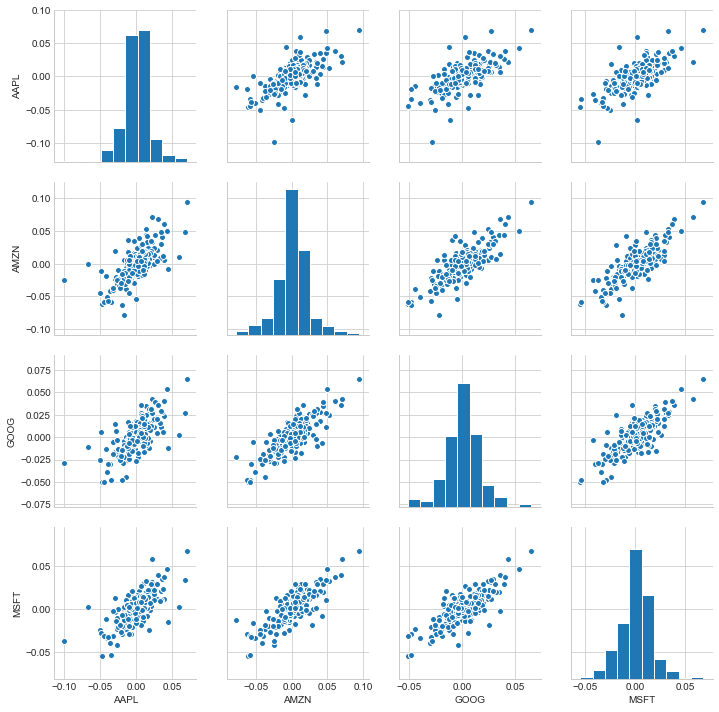

In [91]:
sns.pairplot(pt_change.dropna() , aspect = 1 ,diag_kws = {'edgecolor' : 'w' })

###seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, 
###     kind='scatter/'reg', diag_kind='hist'/'kde', markers=None, size=2.5, aspect=1, dropna=True, 
###     plot_kws=None, diag_kws=None, grid_kws=None)

##it is used for plotting joint plot for every pair of columns in dataset in a form of PairGrid

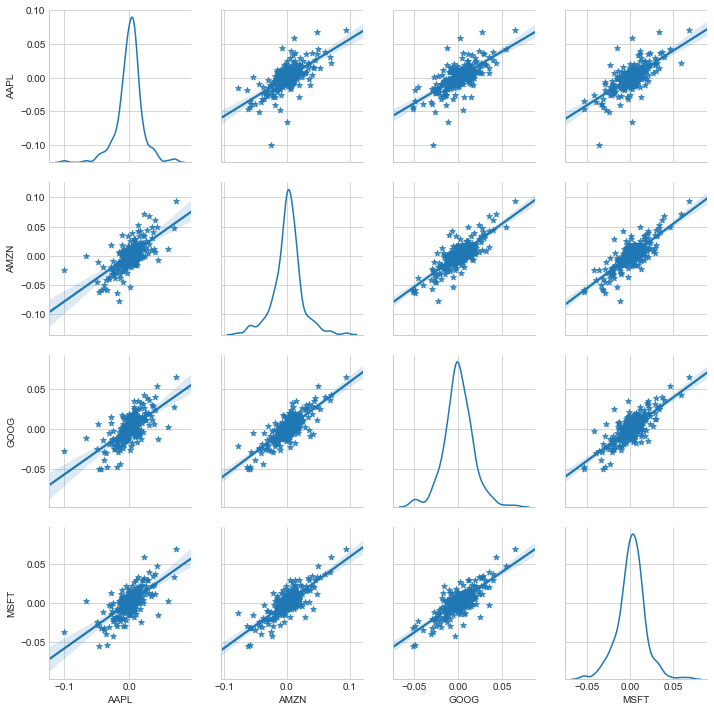

In [92]:
sns.pairplot(pt_change.dropna() , aspect = 1 , diag_kind = 'kde', kind = 'reg', markers = '*')
#s for square #d dor diamond

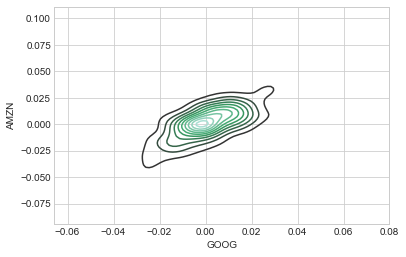

In [93]:
sns.kdeplot(pt_change.GOOG.dropna(), pt_change['AMZN'].dropna(), shade = False, legend = True)
#bivariate kernel density estimation

In [94]:
### The pairplot can take only two values for diag_kind = 'hist' or 'kde' and two values for kind = 'scatter' or 'reg'
### We can change this by using the PairGrid itself instead of pairplot (which internally uses PairGrid)

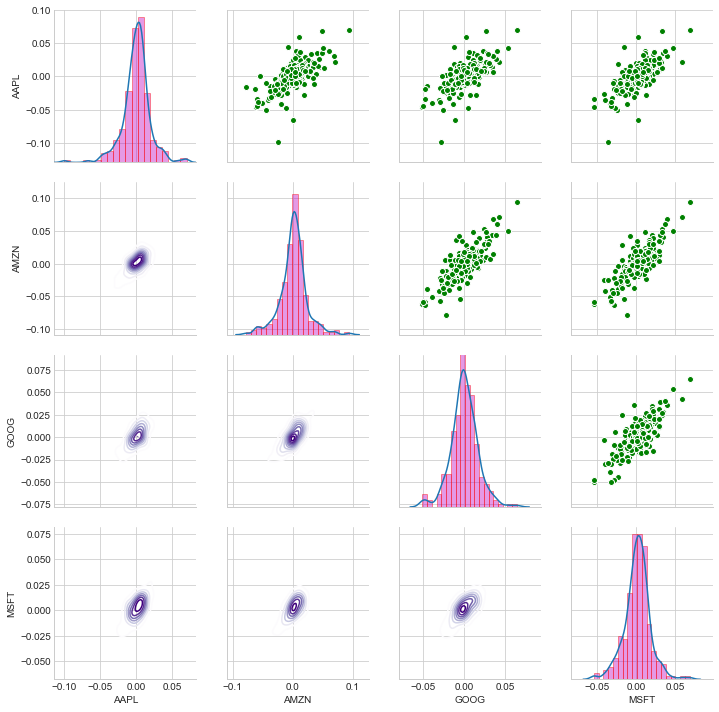

In [95]:
fig = sns.PairGrid(pt_change.dropna())
#map upper diagnol elements to plt.scatter, diagnol to distplot and lower diagnol to kdeplot
fig.map_upper(plt.scatter , edgecolor = 'w', color = 'green') 
fig.map_diag(sns.distplot, rug = False , bins = 20, hist_kws = {'edgecolor':'r', 'color':'m'})
fig.map_lower(sns.kdeplot, cmap = 'Purples')

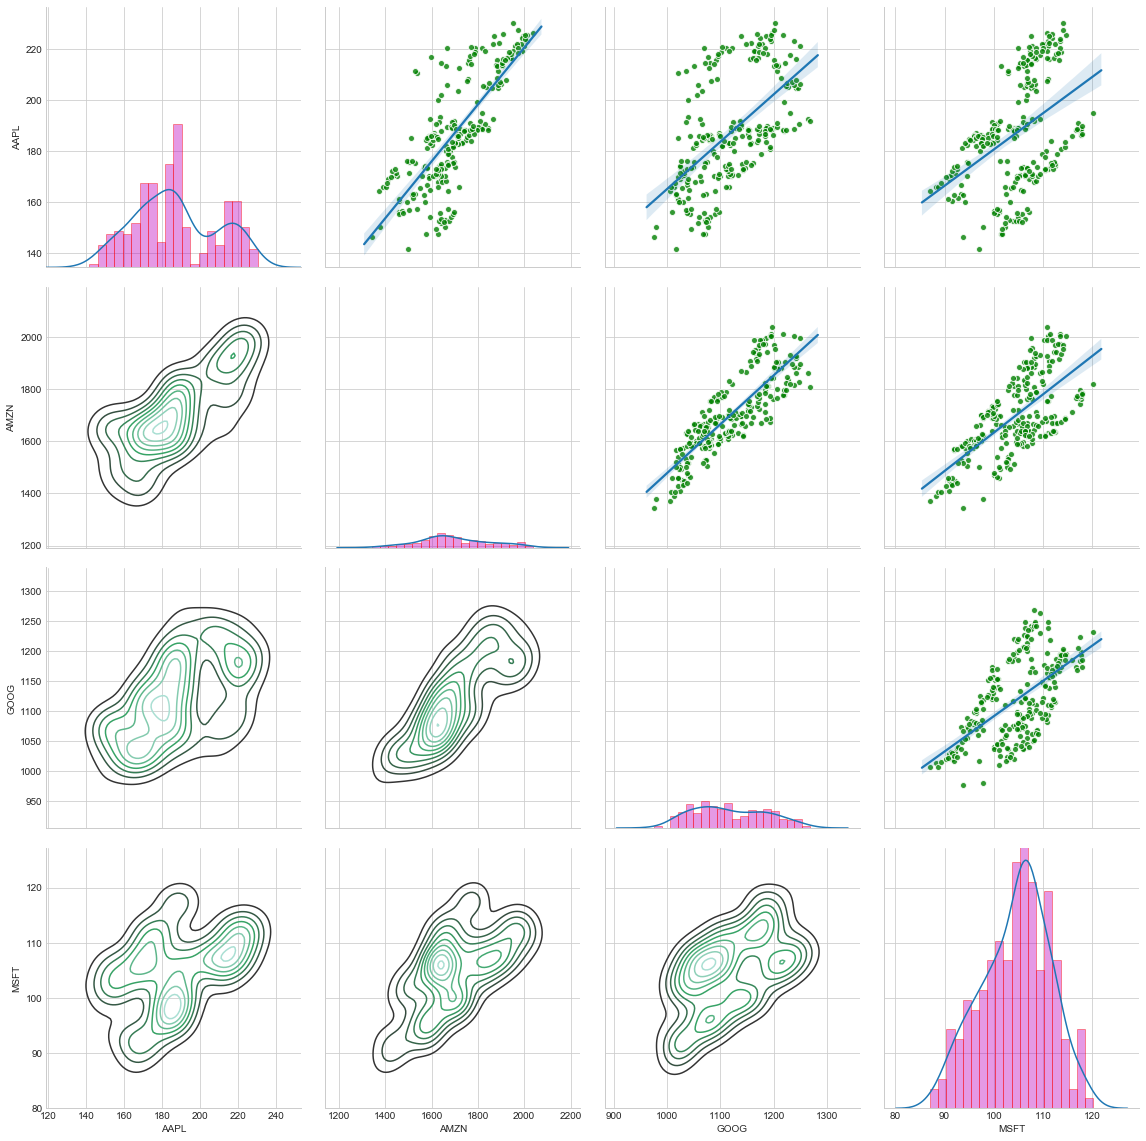

In [96]:
### PairGrid for Adjusted Closing prices
fig = sns.PairGrid(adj_close_df, size = 4, aspect =1)
#map upper diagnol elements to plt.scatter, diagnol to distplot and lower diagnol to kdeplot
fig.map_upper(sns.regplot , scatter_kws = {'edgecolor' : 'w', 'color':'g'}) 
fig.map_diag(sns.distplot, rug = False , bins = 20, hist_kws = {'edgecolor':'r', 'color':'m'})
fig.map_lower(sns.kdeplot)

In [97]:
sns.__version__

'0.8.1'

In [98]:
## ----------PART 4 - RISK ANALYSIS ---------------####

In [99]:
pt_change.std()

AAPL    0.019081
AMZN    0.022480
GOOG    0.016489
MSFT    0.016313
dtype: float64

In [100]:
##Code for std -- just for fun!
var = 0
for i in range(1,len(pt_change)):
    var = var + (pt_change.ix[i] - pt_change.mean())**2
sd = (var / (len(pt_change)-2)) ** 0.5 ##Computing standard deviantion by dividing by n-1 and not n as it is a sample
sd
##values below match exactly above

AAPL    0.019081
AMZN    0.022480
GOOG    0.016489
MSFT    0.016313
dtype: float64

AAPL   0.0007658992606890464   0.01908099871657872
AMZN   0.001295338781651064   0.022479730037670755
GOOG   0.0007490531234991358   0.016489179422032693
MSFT   0.0013478840051534974   0.016312745544877768


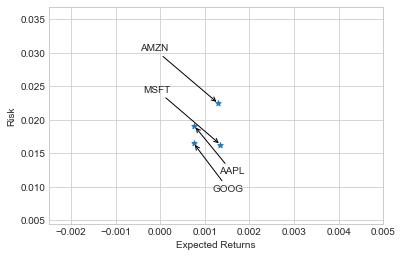

In [101]:
rets = pt_change.dropna()
area = np.pi *10
plt.scatter(rets.mean(),rets.std(), s =area , marker = '*') ## s is the area of the scatter point
plt.xlim([-0.0025,0.0050])
#plt.ylim([0.005,0.0020])
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
k=0
##Set annotation with text, arrows, boxes and many more on the plot
### check out http://matplotlib.org/users/annotations_guide.html
for (label, x, y) in zip(rets.columns,rets.mean(),rets.std()): ##zip function zips the data to make it iteratable 
    print(label," ",x," ",y)
    plt.annotate(label, xy = (x, y), xytext = ((-1)**k*50,(-1)**(k+1)*50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))
    k+=1

In [102]:
###----------------PART 5 - VALUE AT RISK ----------------###

In [103]:
## METHOD 1 - BOOTSTRAP METHOD 

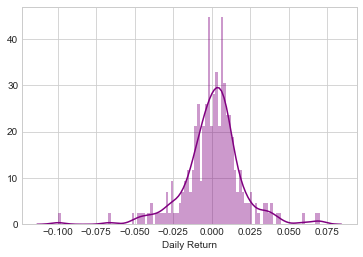

In [104]:
sns.distplot(AAPL['Daily Return'].dropna() , color = 'purple', bins = 100)

In [105]:
AAPL['Daily Return'].quantile(0.05) ## 5 % quantile range
## 5% probability that daily return will be less than -1.5%

-0.02993014851684698

In [106]:
## METHOD 2 - MONTE CARLO METHOD USING GEOMETRIC BROWNIAN MOTION MODEL 

In [107]:
days = 365
dt = 1/days 

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

def monte_carlo(start_price, days , mu, sigma):
    price = np.zeros(days)
    drift = np.zeros(days)
    shock = np.zeros(days)

    price[0] = start_price

    for i in range(1,days):
        drift[i] = mu * dt
        shock[i] = np.random.normal(loc = mu*dt , scale = sigma*np.sqrt(dt))
        price[i] = price[i-1] + price[i-1]*(drift[i]+shock[i])
    
    return price

In [108]:
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2018-04-02  1034.800049   990.369995  1022.820007  1006.469971  2680400   
2018-04-03  1020.989990   994.070007  1013.909973  1013.409973  2275100   
2018-04-04  1028.718018   993.000000   993.409973  1025.140015  2484700   
2018-04-05  1042.790039  1020.130981  1041.329956  1027.810059  1363000   
2018-04-06  1031.420044  1003.030029  1020.000000  1007.039978  1746400   

              Adj Close  
Date                     
2018-04-02  1006.469971  
2018-04-03  1013.409973  
2018-04-04  1025.140015  
2018-04-05  1027.810059  
2018-04-06  1007.039978

Text(0.5,1,'Monte Carlo for GOOGLE')

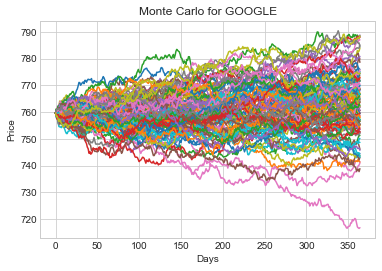

In [109]:
start_price  = 759.659973

for trials in range(1,100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for GOOGLE')

In [110]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1];

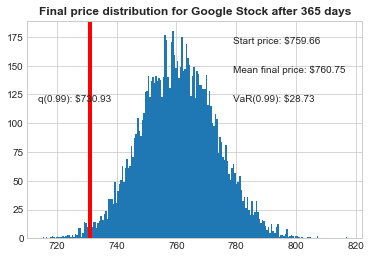

In [111]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, "Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold');